In [1]:
import sys
sys.path.append("../library")

from thinkbayes2 import Suite, Pmf, Cdf, SampleSum
import thinkplot

In [2]:
# class Die, refer to https://github.com/AllenDowney/ThinkBayes2/blob/master/code/chap05.ipynb
class Die(Pmf):
    def __init__(self, sides):
        super().__init__()
        for x in range(1, sides+1):
            self.Set(x, 1)
        self.Normalize()
    
    def __add__(self, other):
#         solution 2: enumration for all cases
        pmf = Pmf()
        for v1, p1 in self.Items():
            for v2, p2 in other.Items():
                pmf.Incr(v1+v2, p1*p2)
        return pmf

In [3]:
# solution 1: simulation
d6 = Die(6)
dice = [d6] * 3
three = SampleSum(dice, 1000)
# solution 2: enumration for real value
three_exact = d6 + d6 + d6

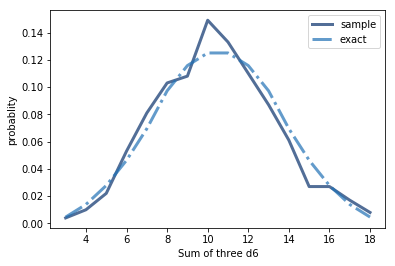

In [4]:
thinkplot.PrePlot(1)
thinkplot.Pdf(three,  label='sample')
# refer to https://stackoverflow.com/questions/13359951/is-there-a-list-of-line-styles-in-matplotlib
thinkplot.Pdf(three_exact, linestyle='--', label='exact')
thinkplot.Show(xlabel='Sum of three d6', ylabel='probablity')